In [1]:
import numpy as np  
import pandas as pd  
import xgboost as xgb  
import operator  
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("titanic_input/train.csv")
# 188318 rows × 132 columns

In [3]:
train

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85
5,13,A,B,A,A,A,A,A,A,B,...,0.364464,0.401162,0.26847,0.46226,0.50556,0.366788,0.359249,0.345247,0.726792,5142.87
6,14,A,A,A,A,B,A,A,A,A,...,0.381515,0.363768,0.24564,0.40455,0.47225,0.334828,0.352251,0.342239,0.382931,1132.22
7,20,A,B,A,B,A,A,A,A,B,...,0.867021,0.583389,0.90267,0.84847,0.80218,0.644013,0.785706,0.859764,0.242416,3585.75
8,23,A,B,B,B,B,A,A,A,B,...,0.628534,0.384099,0.61229,0.38249,0.51111,0.682315,0.669033,0.756454,0.361191,10280.20
9,24,A,B,A,A,B,B,A,A,B,...,0.713343,0.469223,0.30260,0.67135,0.83510,0.863052,0.879347,0.822493,0.294523,6184.59


In [4]:
cat_sel = [n for n in train.columns if n.startswith('cat')]  #类别特征数值化
# cat_sel = ['cat1','cat2',...,'cat113','cat114','cat115','cat116']

In [6]:
for column in cat_sel:
    train[column] = pd.factorize(train[column].values , sort=True)[0] + 1

In [7]:
train

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,1,2,1,2,1,1,1,1,2,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,1,2,1,1,1,1,1,1,2,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,1,2,1,1,2,1,1,1,2,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,2,2,1,2,1,1,1,1,2,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,1,2,1,2,1,1,1,1,2,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85
5,13,1,2,1,1,1,1,1,1,2,...,0.364464,0.401162,0.26847,0.46226,0.50556,0.366788,0.359249,0.345247,0.726792,5142.87
6,14,1,1,1,1,2,1,1,1,1,...,0.381515,0.363768,0.24564,0.40455,0.47225,0.334828,0.352251,0.342239,0.382931,1132.22
7,20,1,2,1,2,1,1,1,1,2,...,0.867021,0.583389,0.90267,0.84847,0.80218,0.644013,0.785706,0.859764,0.242416,3585.75
8,23,1,2,2,2,2,1,1,1,2,...,0.628534,0.384099,0.61229,0.38249,0.51111,0.682315,0.669033,0.756454,0.361191,10280.20
9,24,1,2,1,1,2,2,1,1,2,...,0.713343,0.469223,0.30260,0.67135,0.83510,0.863052,0.879347,0.822493,0.294523,6184.59


In [21]:
params = {
    'min_child_weight': 90,
    'eta': 0.1,
    'colsample_bytree': 0.7,
    'max_depth': 12,
    'subsample': 0.7,
    'alpha': 1,
    'gamma': 1,
    'silent': 1,
    'verbose_eval': True,
    'seed': 12
}

In [22]:
rounds = 10
y = train['loss']
X = train.drop(['loss', 'id'], 1)

In [23]:
xgtrain = xgb.DMatrix(X, label=y)

In [24]:
print xgtrain

In [25]:
bst = xgb.train(params, xgtrain, num_boost_round=rounds)

In [26]:
def ceate_feature_map(features):
    outfile = open('xgb.fmap', 'w')
    i = 0
    for feat in features:
        outfile.write('{0}\t{1}\tq\n'.format(i, feat))
        i = i + 1
    outfile.close()

In [27]:
features = [x for x in train.columns if x not in ['id','loss']]
ceate_feature_map(features)

In [28]:
importance = bst.get_fscore(fmap='xgb.fmap')
importance = sorted(importance.items(), key=operator.itemgetter(1))

In [29]:
importance

[('cat30', 1),
 ('cat45', 1),
 ('cat41', 1),
 ('cat61', 1),
 ('cat78', 1),
 ('cat83', 1),
 ('cat96', 1),
 ('cat14', 1),
 ('cat24', 1),
 ('cat29', 1),
 ('cat28', 1),
 ('cat31', 2),
 ('cat102', 2),
 ('cat77', 2),
 ('cat16', 2),
 ('cat54', 3),
 ('cat66', 3),
 ('cat8', 3),
 ('cat93', 3),
 ('cat90', 3),
 ('cat71', 4),
 ('cat89', 4),
 ('cat88', 4),
 ('cat40', 5),
 ('cat76', 5),
 ('cat80', 5),
 ('cat84', 5),
 ('cat86', 7),
 ('cat9', 7),
 ('cat99', 7),
 ('cat104', 8),
 ('cat3', 8),
 ('cat7', 8),
 ('cat97', 8),
 ('cat52', 10),
 ('cat25', 10),
 ('cat106', 13),
 ('cat98', 13),
 ('cat49', 14),
 ('cat37', 15),
 ('cat107', 15),
 ('cat57', 16),
 ('cat23', 16),
 ('cat36', 17),
 ('cat95', 17),
 ('cat82', 18),
 ('cat79', 19),
 ('cat12', 19),
 ('cat13', 19),
 ('cat11', 20),
 ('cat27', 20),
 ('cat50', 21),
 ('cat10', 23),
 ('cat115', 24),
 ('cat38', 28),
 ('cat6', 28),
 ('cat44', 29),
 ('cat116', 30),
 ('cat75', 30),
 ('cat53', 31),
 ('cat109', 31),
 ('cat105', 31),
 ('cat26', 31),
 ('cat110', 32),
 ('cat

In [30]:
df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df['fscore'] = df['fscore'] / df['fscore'].sum()
df.to_csv("titanic_input/feat_importance.csv", index=False)

In [33]:
feature_select = pd.read_csv('titanic_input/feat_importance.csv')
feature_select

,feature,fscore
0,cat30,0.000230
1,cat45,0.000230
2,cat41,0.000230
3,cat61,0.000230
4,cat78,0.000230
5,cat83,0.000230
6,cat96,0.000230
7,cat14,0.000230
8,cat24,0.000230
9,cat29,0.000230


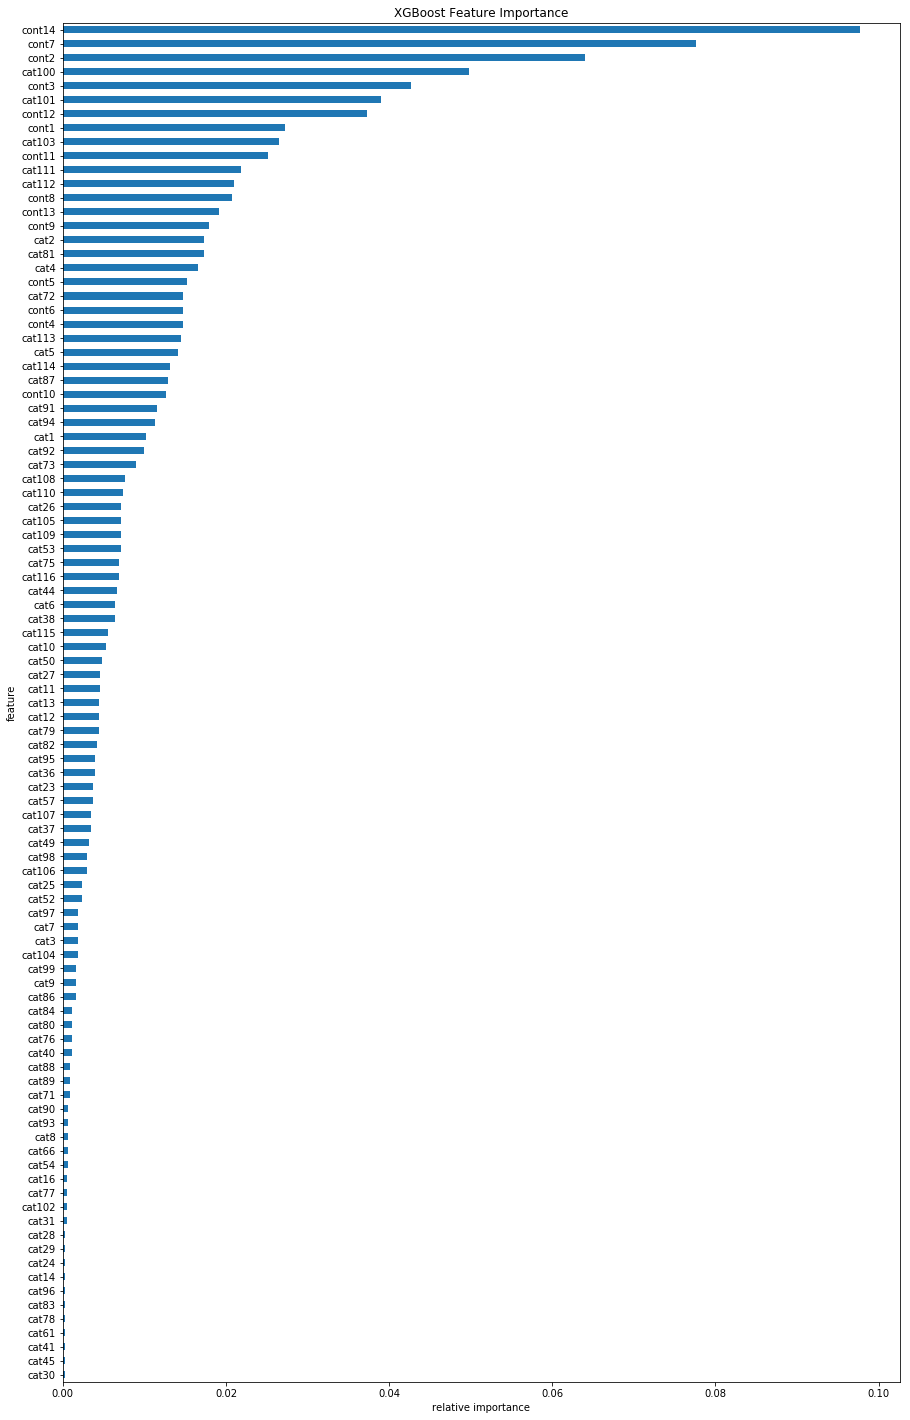

In [31]:
plt.figure()
df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(15, 25))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
plt.show()